# Final Project: Analysis of Mechanisms of Action: EDA in R
# Jacob Tiede
## Read in the Data:

In [1]:
data = read.csv("./Data/train_features.csv")

## EDA:

In [3]:
library(dplyr)

print("The dimension of the data is:")
print(dim(data))
print("Number of NA values:")
print(sum(is.na(data)))

#This is a separate file on the Kaggle page for this dataset
drug_names = read.csv("./Data/train_drug.csv")
print("How many unique compounds are in the data:")
print(dim(data.frame(unique(drug_names$drug_id)))[1])

#----------
#Since there are many variables in the data it may be helpful to look at summary information about the genomic/cell 
#data as aggregates:
#----------

print("Summary stats for genetic markers:")
gen_data = data %>% select(contains("g.")) #Selects only columns with g. in the column name
print(paste("Mean: ", mean(data.matrix(gen_data))))
print(paste("Standard Deviation: ", sd(data.matrix(gen_data))))
print(paste("Median: ", median(data.matrix(gen_data))))
print(paste("Number of values: ", dim(gen_data)[1]*dim(gen_data)[2]))
print(paste("Number of zeros: ", sum(data.matrix(gen_data)==0)))
print(paste("Number of non-zeros: ", sum(data.matrix(gen_data)!=0)))
print(paste("Range of values: ", min(data.matrix(gen_data))))
print("to")
print(max(data.matrix(gen_data)))

print("Summary stats for cell markers:")
gen_data = data %>% select(contains("c."))#Selects only columns with c. in the column name
print(paste("Mean: ", mean(data.matrix(gen_data))))
print(paste("Standard Deviation: ", sd(data.matrix(gen_data))))
print(paste("Median: ", median(data.matrix(gen_data))))
print(paste("Number of values: ", dim(gen_data)[1]*dim(gen_data)[2]))
print(paste("Number of zeros: ", sum(data.matrix(gen_data)==0)))
print(paste("Number of non-zeros: ", sum(data.matrix(gen_data)!=0)))
print(paste("Range of values: ", min(data.matrix(gen_data))))
print("to")
print(max(data.matrix(gen_data)))

[1] "The dimension of the data is:"
[1] 23814   876
[1] "Number of NA values:"
[1] 0
[1] "How many unique compounds are in the data:"
[1] 3289
[1] "Summary stats for genetic markers:"
[1] "Mean:  0.00900957315024772"
[1] "Standard Deviation:  1.2360866094603"
[1] "Median:  0"
[1] "Number of values:  18384408"
[1] "Number of zeros:  75763"
[1] "Number of non-zeros:  18308645"
[1] "Range of values:  -10"
[1] "to"
[1] 10
[1] "Summary stats for cell markers:"
[1] "Mean:  -0.432231284832451"
[1] "Standard Deviation:  1.90458703062811"
[1] "Median:  -0.0054"
[1] "Number of values:  2381400"
[1] "Number of zeros:  128"
[1] "Number of non-zeros:  2381272"
[1] "Range of values:  -10"
[1] "to"
[1] 6.412


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"package 'tidyr' was built under R version 3.6.3"Adding missing grouping variables: `cp_type`


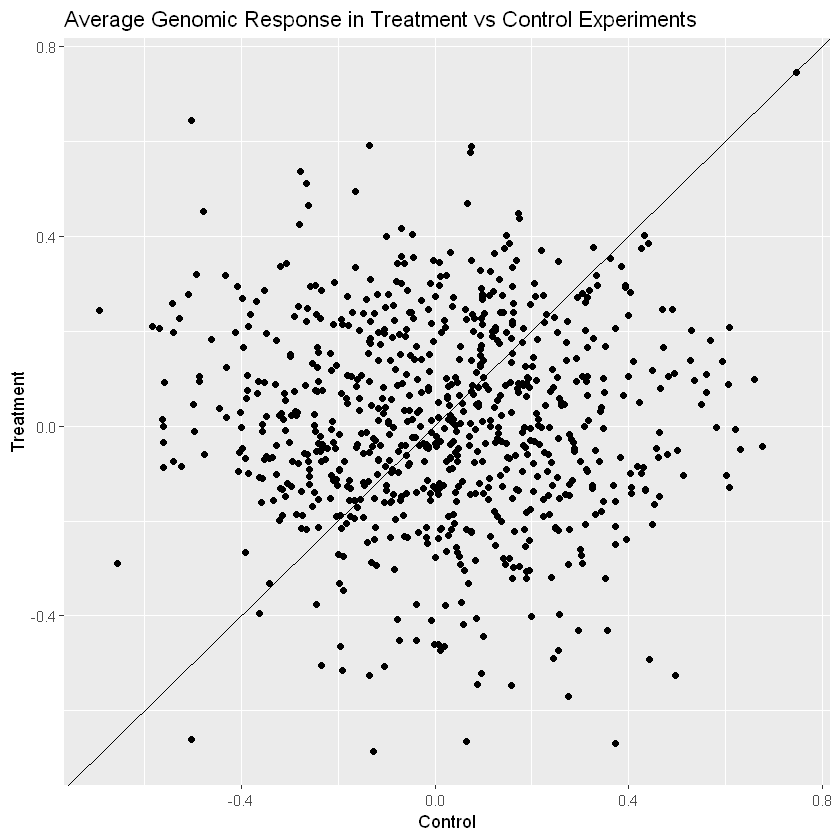

In [3]:
#----------
#Let's try looking at some plots, first, let's look at means based on what groups they are in (treatment or control)
#----------
library(ggplot2)
library(tidyr)
#----------
#This code with group by treatment and control groups, select only genetic markers, then find the mean of each column
#----------
summary_gen_data = data %>% 
    group_by(cp_type) %>%
    select(contains("g.")) %>%
    summarise_all(mean)
summary_gen_data = data.frame(t(data.matrix(summary_gen_data))[-1,])
colnames(summary_gen_data) = c('ctl_vehicle', 'trt_cp')

#Create the plot (described in the report)
ggplot(data = summary_gen_data) + 
    geom_point(mapping = aes(x = ctl_vehicle, y = trt_cp))+
    xlab("Control") +
    ylab("Treatment") +
    ggtitle("Average Genomic Response in Treatment vs Control Experiments")+
    geom_abline(intercept = 0, slope = 1)

Adding missing grouping variables: `cp_type`


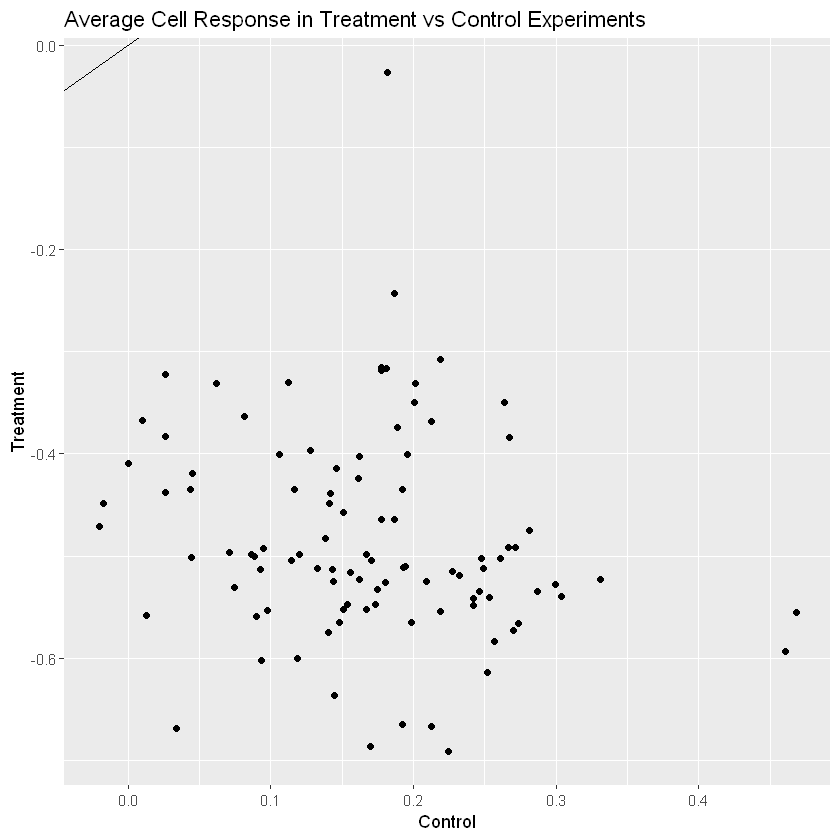

In [4]:
#----------
#This code with group by treatment and control groups, select only cell markers, then find the mean of each column
#----------
summary_gen_data = data %>% 
    group_by(cp_type) %>%
    select(contains("c.")) %>%
    summarise_all(mean)
summary_gen_data = data.frame(t(data.matrix(summary_gen_data))[-1,])
colnames(summary_gen_data) = c('ctl_vehicle', 'trt_cp')

#Create plot (described in the report)
ggplot(data = summary_gen_data) + 
    geom_point(mapping = aes(x = ctl_vehicle, y = trt_cp))+
    xlab("Control") +
    ylab("Treatment") +
    ggtitle("Average Cell Response in Treatment vs Control Experiments")+
    geom_abline(intercept = 0, slope = 1)


Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine

Adding missing grouping variables: `cp_type`, `cp_dose`


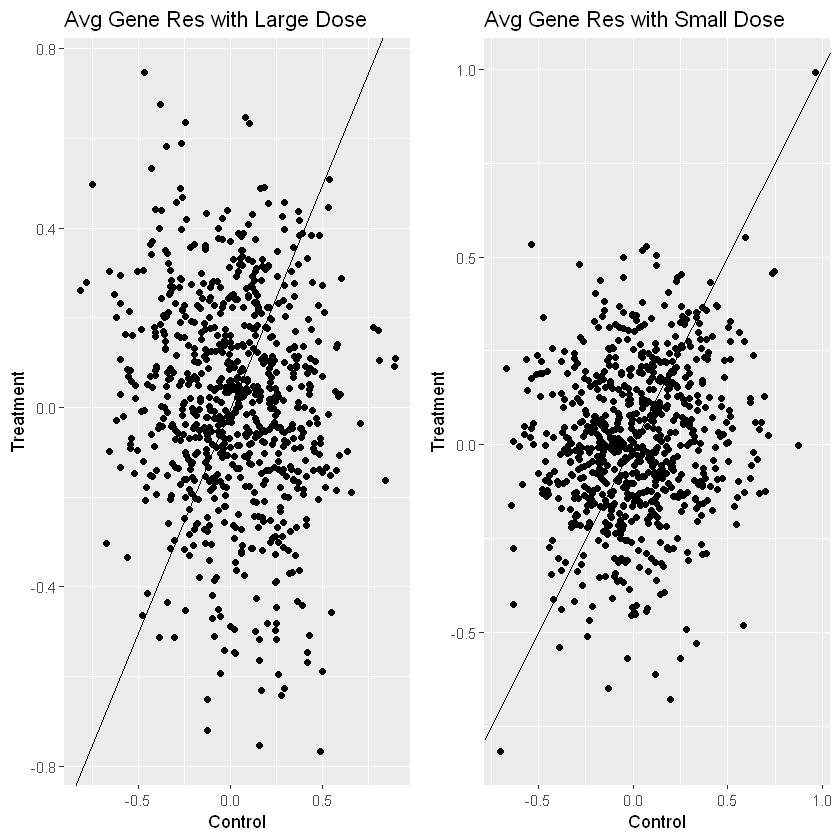

In [5]:
library(gridExtra)
#----------
#Dosage may also be an interesting variable to consider:
#----------
#this time group by dose and experiment type (The rest is almost the same as the above plots)
summary_gen_data = data %>% 
    group_by(cp_type,cp_dose) %>%
    select(contains("g.")) %>%
    summarise_all(mean)
summary_gen_data = data.frame(t(data.matrix(summary_gen_data)))
rows_to_remove = c("cp_type", "cp_dose")
summary_gen_data = summary_gen_data[!(row.names(summary_gen_data) %in% rows_to_remove), ]
colnames(summary_gen_data) = c('ctl_D1', 'ctl_D2', 'trt_D1', 'trt_D2')
p1 = ggplot(data = summary_gen_data) + 
    geom_point(mapping = aes(x = ctl_D1, y = trt_D1))+
    xlab("Control") +
    ylab("Treatment") +
    ggtitle("Avg Gene Res with Large Dose")+
    geom_abline(intercept = 0, slope = 1)
p2 = ggplot(data = summary_gen_data) + 
    geom_point(mapping = aes(x = ctl_D2, y = trt_D2))+
    xlab("Control") +
    ylab("Treatment") +
    ggtitle("Avg Gene Res with Small Dose")+
    geom_abline(intercept = 0, slope = 1)
grid.arrange(p1, p2, nrow = 1)

Adding missing grouping variables: `cp_type`, `cp_dose`


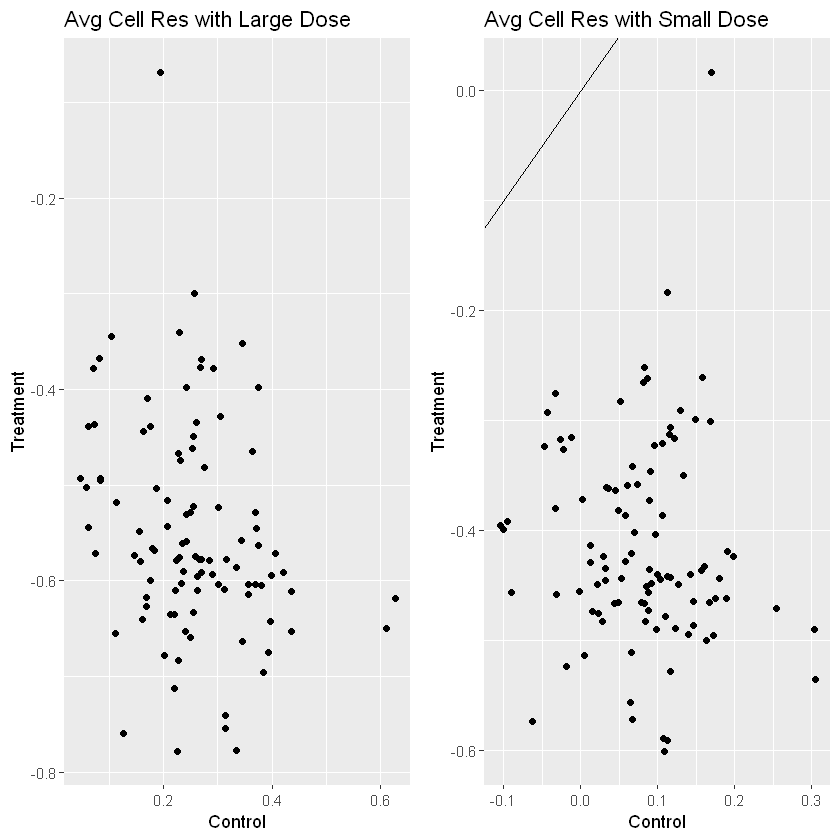

In [6]:
#Same as above but with cell traits
summary_gen_data = data %>% 
    group_by(cp_type,cp_dose) %>%
    select(contains("c.")) %>%
    summarise_all(mean)
summary_gen_data = data.frame(t(data.matrix(summary_gen_data)))
rows_to_remove = c("cp_type", "cp_dose")
summary_gen_data = summary_gen_data[!(row.names(summary_gen_data) %in% rows_to_remove), ]
colnames(summary_gen_data) = c('ctl_D1', 'ctl_D2', 'trt_D1', 'trt_D2')
p1 = ggplot(data = summary_gen_data) + 
    geom_point(mapping = aes(x = ctl_D1, y = trt_D1))+
    xlab("Control") +
    ylab("Treatment") +
    ggtitle("Avg Cell Res with Large Dose")+
    geom_abline(intercept = 0, slope = 1)
p2 = ggplot(data = summary_gen_data) + 
    geom_point(mapping = aes(x = ctl_D2, y = trt_D2))+
    xlab("Control") +
    ylab("Treatment") +
    ggtitle("Avg Cell Res with Small Dose")+
    geom_abline(intercept = 0, slope = 1)
grid.arrange(p1, p2, nrow = 1)

In [7]:
#Now let's take a look at the response:
response = read.csv("./Data/train_targets_scored.csv")

[1] "The dimension of the response is:"
[1] 23814   207
[1] "Number of NA values:"
[1] 0
[1] "Can a drug have multiple MOAs?"
[1] "Here is the max sum of a given row:"
[1] 7


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


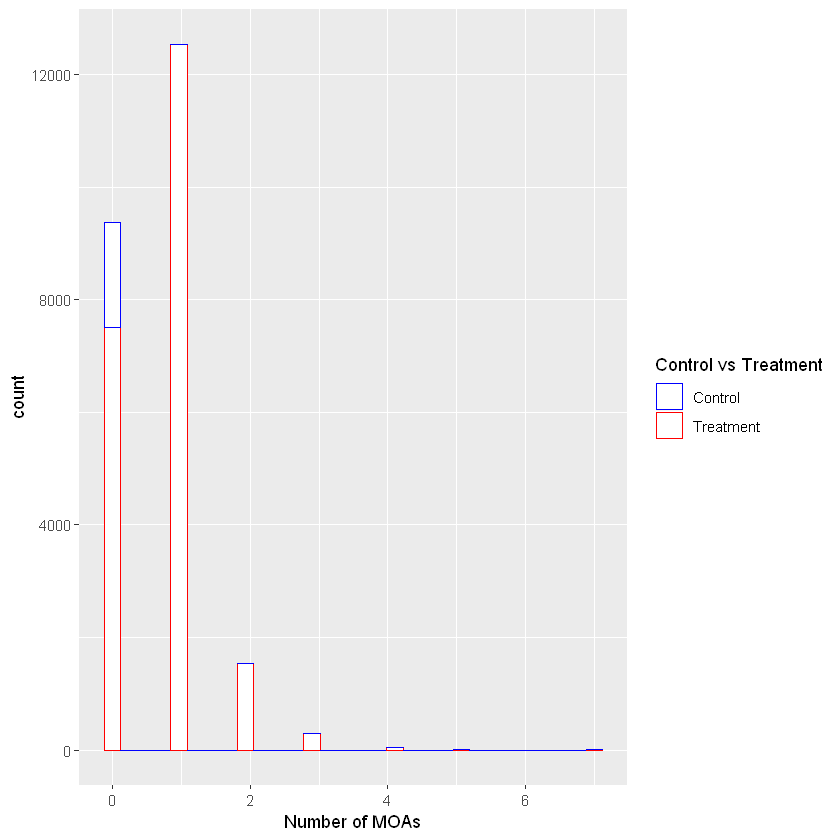

In [8]:
print("The dimension of the response is:")
print(dim(response))
print("Number of NA values:")
print(sum(is.na(response)))

print("Can a drug have multiple MOAs?")
print("Here is the max sum of a given row:")
response$sig_id = NULL
print(max(rowSums(response)))
ggplot(data = data.frame(rowSums(response)), aes(x= rowSums.response., color=data$cp_type)) +
    geom_histogram(fill="white")+
    xlab("Number of MOAs") +
    labs(color ='Control vs Treatment') +
    scale_color_manual(labels = c("Control", "Treatment"), values = c("blue", "red"))

Warning message:
"Ignoring unknown parameters: binwidth, bins, pad"

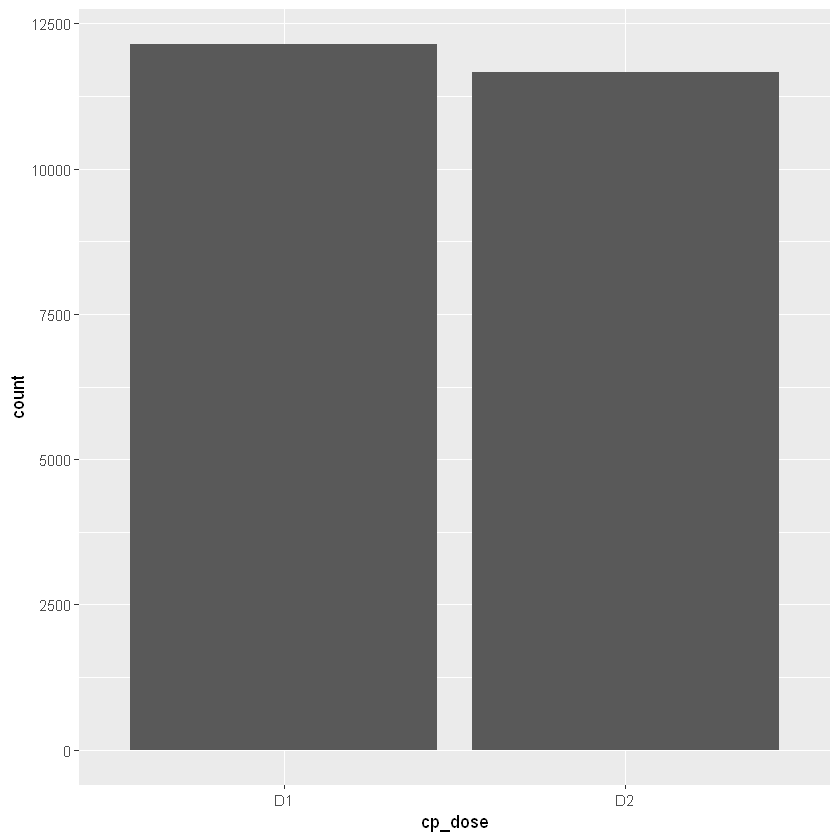

In [9]:
# check for balance in dosage
ggplot(data, aes(x = cp_dose)) + geom_histogram(stat = "count")